In [1]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

df = pd.read_csv("ds3010projdataset.csv")

df1 = df.drop(['International', 'Nationality'], axis = 1)
df1.head()

df2 = df1.drop(['Application order', 'Application mode', 'Marital status'], axis = 1)
df2.head()




,Course,Daytime/evening attendance,Previous qualification,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,...,Curricular units (credited),Curricular units (enrolled),Curricular units (evaluations),Curricular units (approved),Curricular units (grade),Curricular units (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,2,1,1,13,10,6,10,1,0,0,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,11,1,1,1,3,4,4,1,0,0,...,0,12,12,12,27.666667,0,13.9,-0.3,0.79,Graduate
2,5,1,1,22,27,10,10,1,0,0,...,0,12,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,15,1,1,23,27,6,4,1,0,0,...,0,12,18,11,25.828571,0,9.4,-0.8,-3.12,Graduate
4,3,0,1,22,28,10,10,0,0,0,...,0,12,15,11,25.333333,0,13.9,-0.3,0.79,Graduate


In [2]:
from sklearn.model_selection import train_test_split
X = df2.drop('Target', axis = 1)
y = df2[['Target']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, train_size=0.70)

# print(len(X_train))
# print(len(X_test))

clfModel = DecisionTreeClassifier(criterion = 'gini', random_state = 42, max_depth = 6, min_samples_leaf = 10)
clfModel.fit(X_train, y_train)




DecisionTreeClassifier(max_depth=6, min_samples_leaf=10, random_state=42)

In [3]:
from sklearn.metrics import accuracy_score
yPredict = clfModel.predict(X_test)

accuracy_score(y_test, yPredict) 

0.7409638554216867

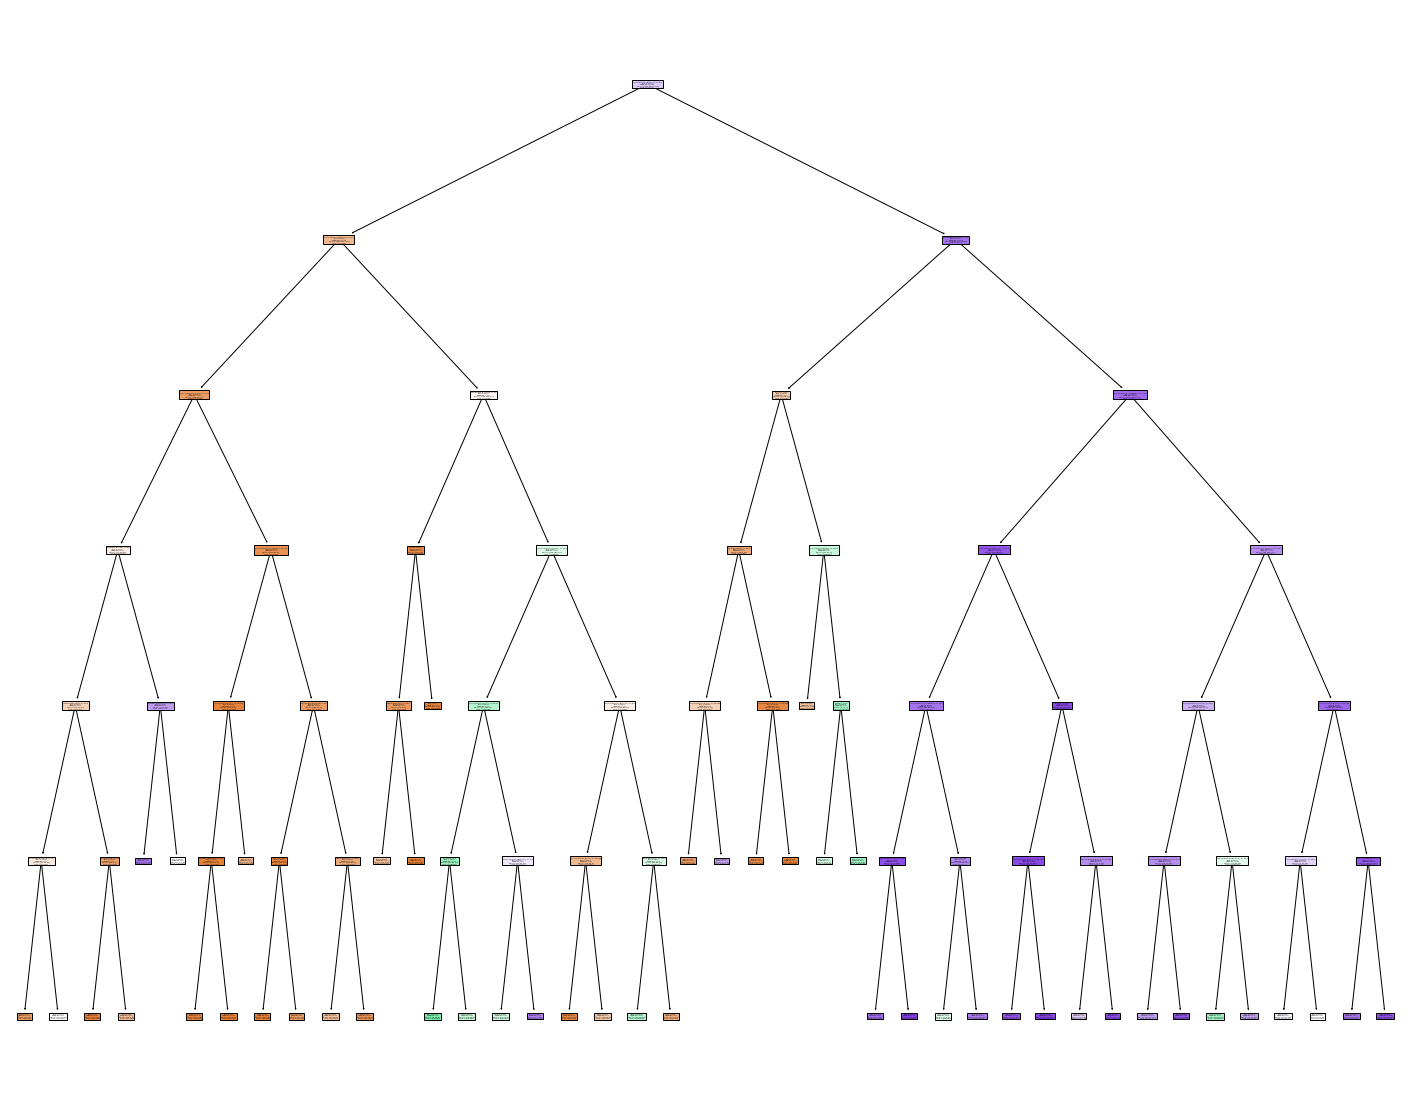

In [4]:
from sklearn import tree

target = list(df['Target'].unique())
features = list(X.columns)

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clfModel, 
                   feature_names = features,  
                   class_names = target,
                   filled=True)



In [5]:
from sklearn.ensemble import RandomForestClassifier

rfcModel = RandomForestClassifier(n_estimators = 150)

rfcModel.fit(X_train, y_train)
y_pred = rfcModel.predict(X_test)

accuracy_score(y_test, y_pred)



<ipython-input-5-aef80417c1e3>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfcModel.fit(X_train, y_train)


0.7695783132530121

In [6]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (25,25), dpi=800)
tree.plot_tree(rfcModel.estimators_[0],
               feature_names = features, 
               class_names=target,
               filled = True);


Error in callback <function flush_figures at 0x000002B7243EB430> (for post_execute):


KeyboardInterrupt: 

In [6]:
from sklearn import svm

svmModel = svm.SVC(random_state=42, kernel='linear', degree=5, gamma='auto',shrinking=False)

svmModel.fit(X_train, y_train)
y_pred = svmModel.predict(X_test)

accuracy_score(y_test, y_pred)

C:\Users\karat\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.7552710843373494

In [7]:
from sklearn.neural_network import MLPClassifier

neurnet = MLPClassifier(solver='adam',hidden_layer_sizes=(11,11),random_state=42, alpha=1e-5, max_iter=10000)
neurnet.fit(X_train, y_train)


y_pred = neurnet.predict(X_test)

accuracy_score(y_test, y_pred)


C:\Users\karat\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.7477409638554217